In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',85)

In [45]:
file_train = "/Users/ishashah/Documents/python/Housing Dataset/train.csv"
file_test = "/Users/ishashah/Documents/python/Housing Dataset/test.csv"

In [46]:
df_test = pd.read_csv(file_test)
#df_test.head()
df_train = pd.read_csv(file_train)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
# size of the database
print("size of training dataset : ", df_train.shape)
print("size of test dataset : ",df_test.shape)

size of training dataset :  (1460, 81)
size of test dataset :  (1459, 80)


In [48]:
# find the datatypes
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


1) Find missing columns
2) Remove missing columns which is more than 20% data missing
3) replace categorical with the mode strategy if the value is used more than 50% 
4) plot barplot for each categorical feature - remove the ones which is not required
4) Replace numberical with -1 and categorical with unknown - plot histogram for numerical
5) Feature Engeering - look at the correlation
6) Filter out highest correlated variables
7) Look at the target variable using histogram - there is skewness - perform standardization(log transformation)
8) apply models


In [49]:
# find the missing values
missing_train = df_train.isnull().sum()

In [50]:
#find the missing values in test
missing_test = df_test.isnull().sum()

Anything with more than 15% of missing values will be removed

In [65]:
df_train.isnull().sum()

MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0


In [51]:
# since both training and testing dataset has almost same fields having null values
# remove the missing value columns if the null values are high
# treat other columns which have some null values
train_mask = (missing_train)/1460 > 0.15
missing_train[train_mask].index
missing_list = ['Id','LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature']
df_train = df_train.drop(missing_list, axis = 1)
df_test = df_test.drop(missing_list, axis = 1)

In [38]:
#fill integer/float fields with 0

for column in df_train.select_dtypes(exclude = ['object']):
    df_train[column] = df_train.fillna(-1)

for column in df_test.select_dtypes(exclude=['object']):
    df_test[column] = df_test.fillna(-1)

In [39]:
# fill missing categorical data with unknown
for column in df_train.select_dtypes(include=['object']):
    df_train[column] = df_train[column].fillna("unknown")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12984dc18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12ba3f550>]], dtype=object)

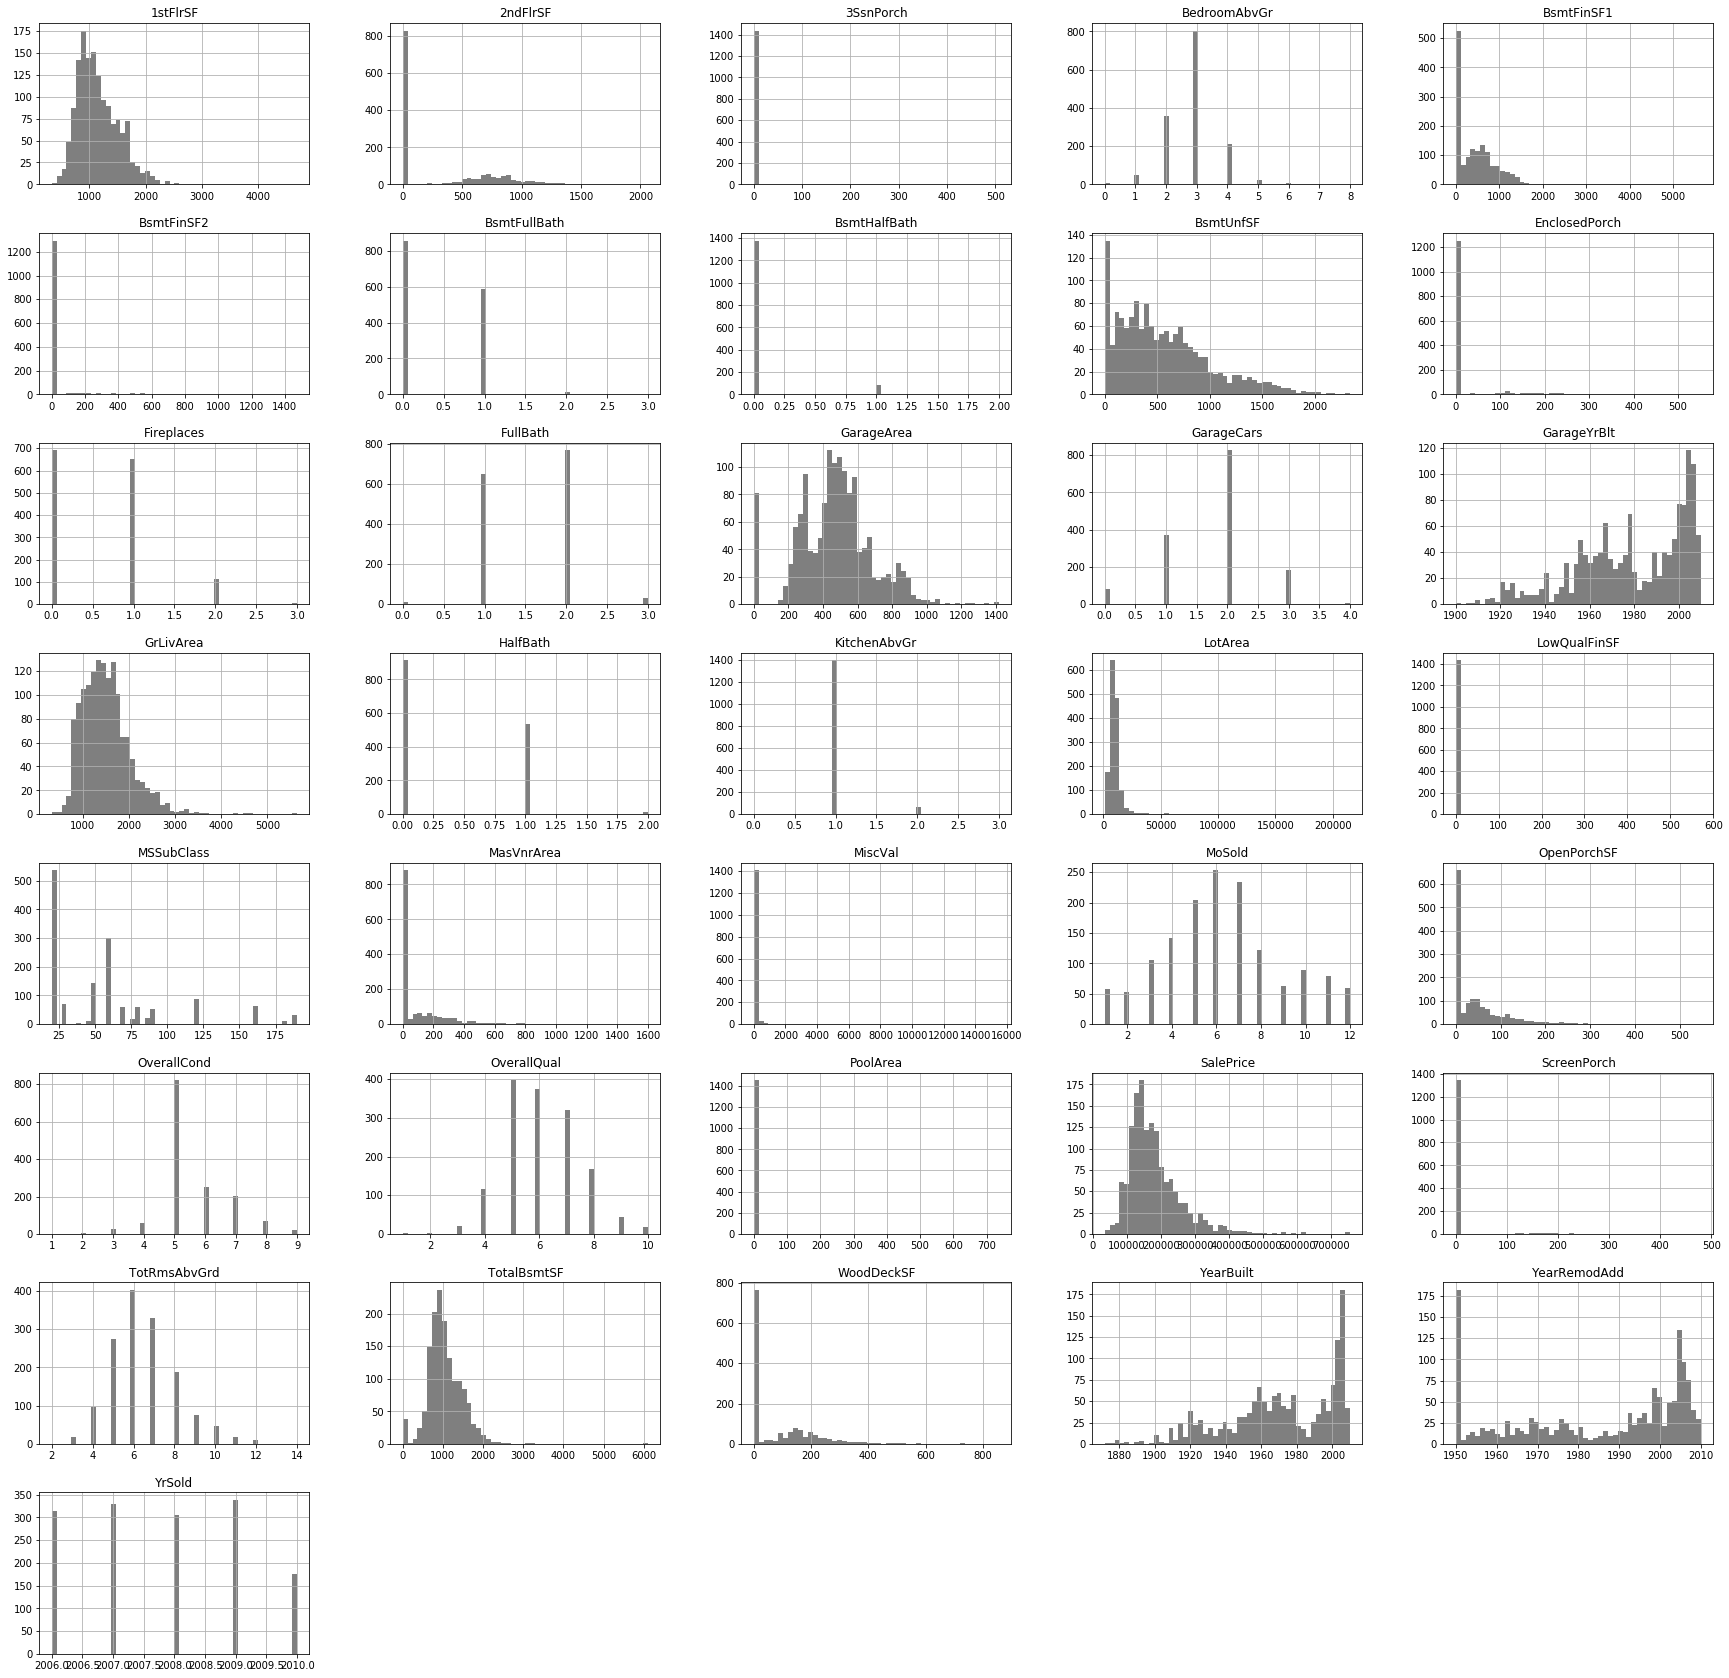

In [52]:
# plot histogram

plt.figure()
df_train.hist(layout = (8,5), color = 'k', alpha=0.5, bins=50, figsize = (30,30))

In [53]:
# removing features which has no variance
missing_list1 = ['3SsnPorch', 'BsmtFinSF2', 'EnclosedPorch', 'LowQualFinSF', 'MiscVal', 'PoolArea', 'ScreenPorch', 'WoodDeckSF']
df_train = df_train.drop(missing_list1, axis=1)


In [64]:
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64


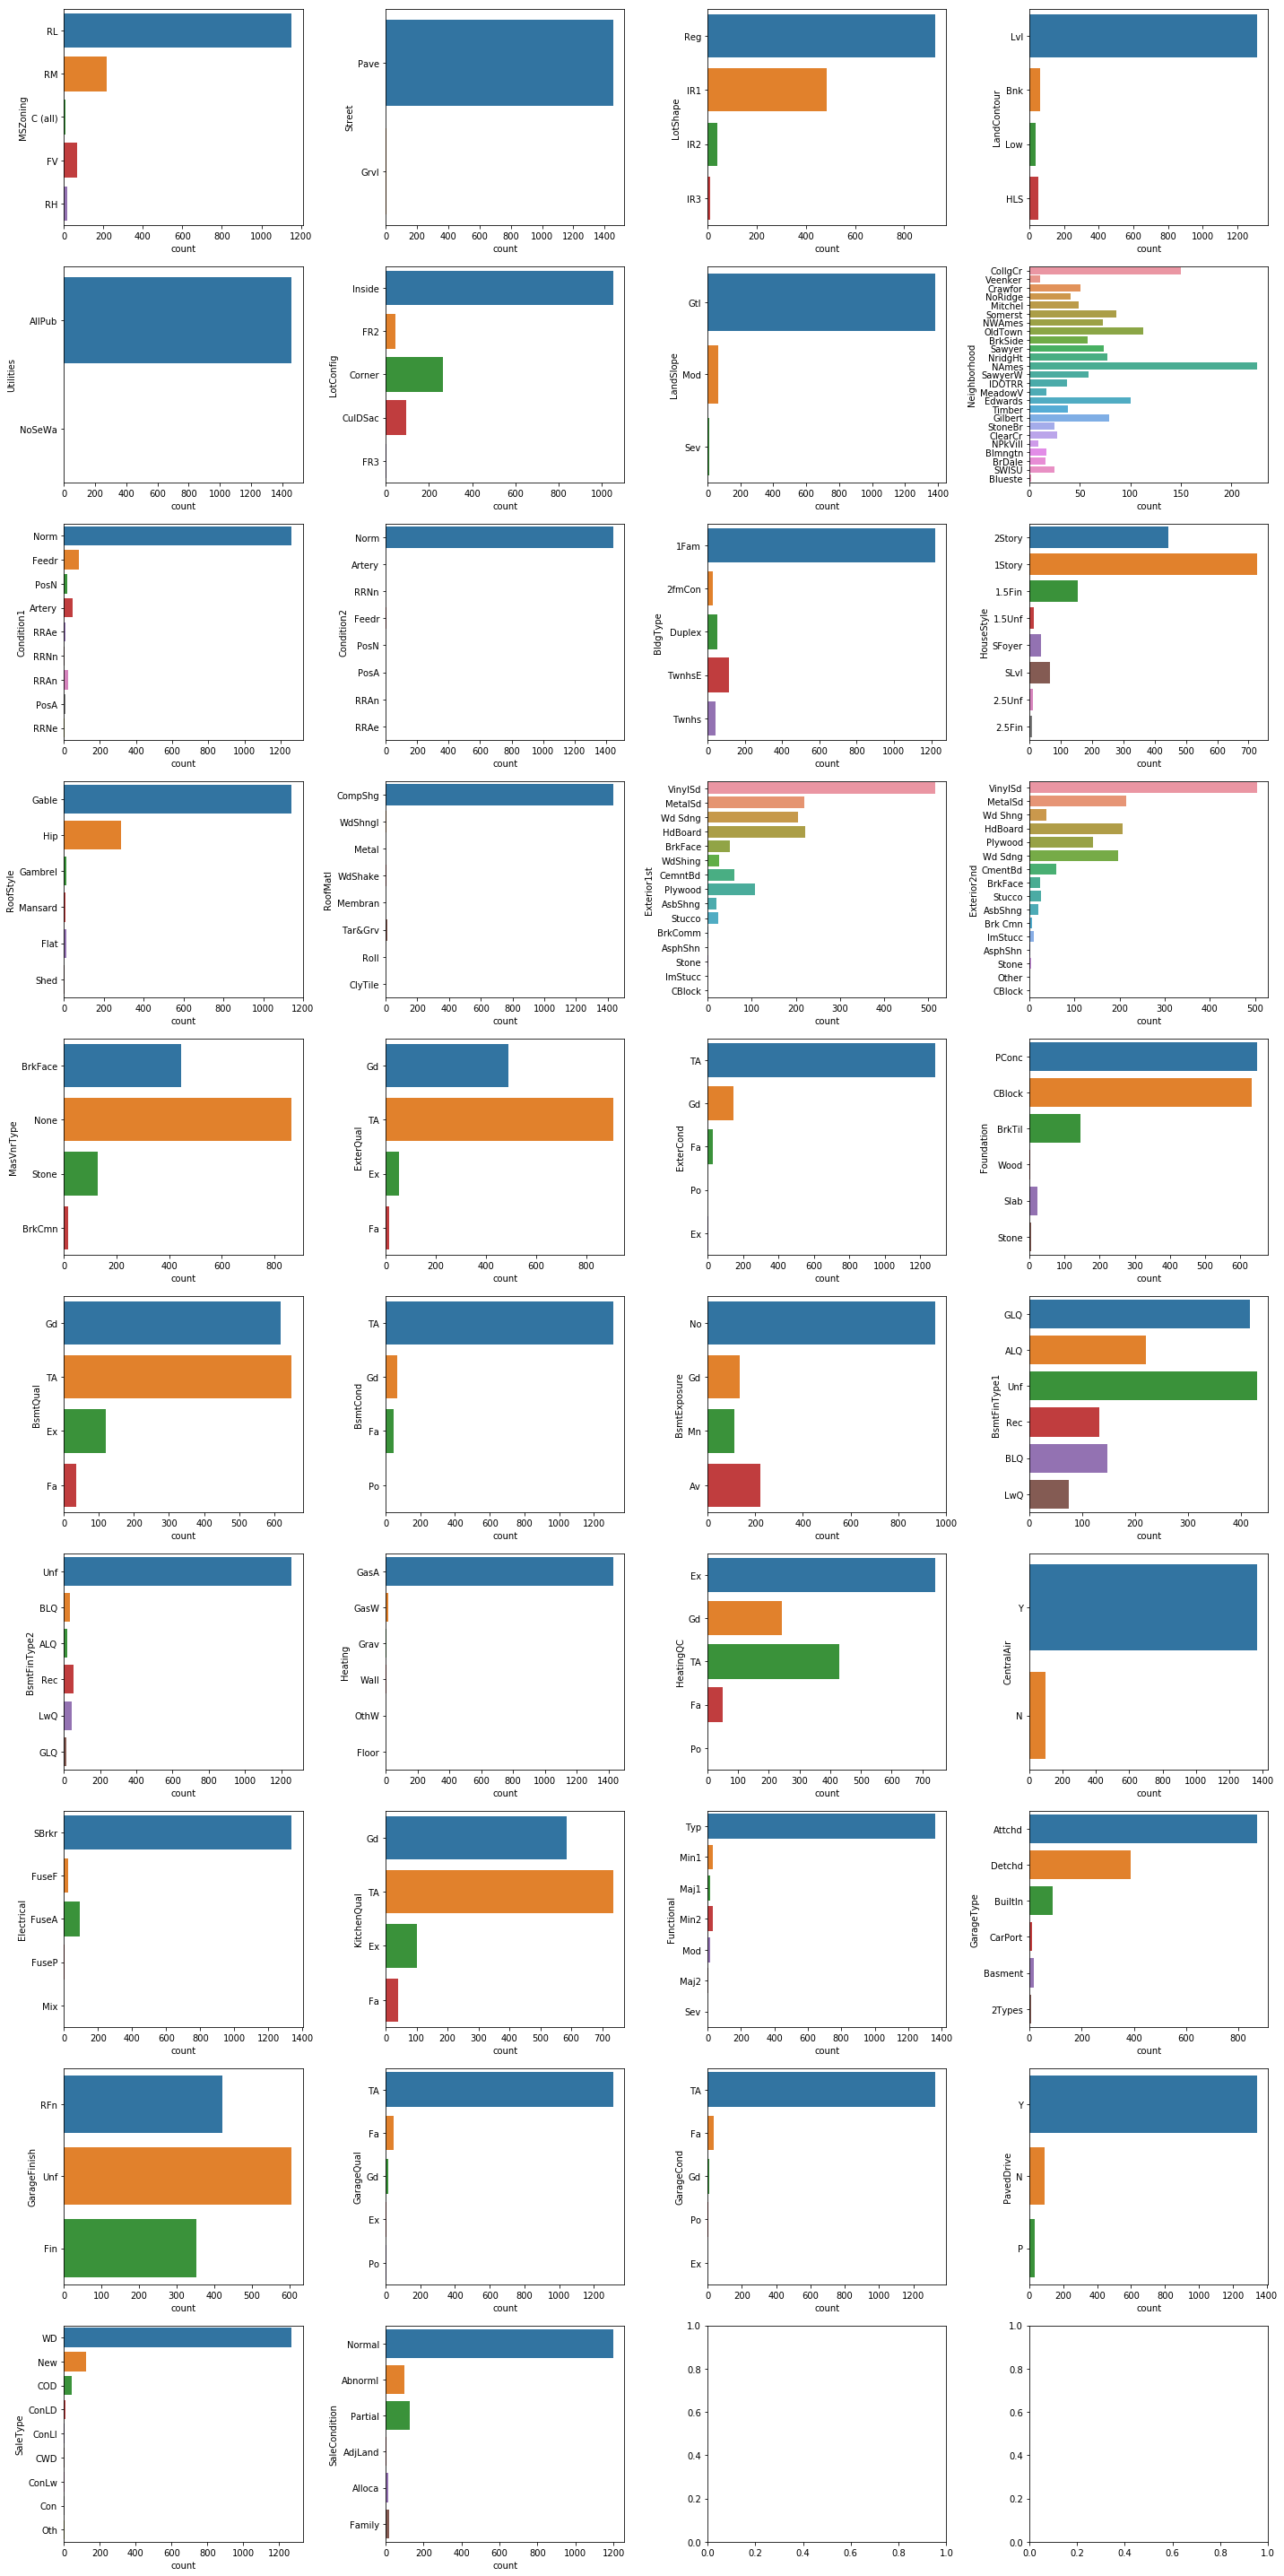

In [62]:
#plot categorical data in bar plot
fig , axes = plt.subplots(10,4, figsize = (20,40))
axes = axes.flatten()
object_bol = df_train.dtypes == 'object'

for ax, catplot in zip(axes, df_train.dtypes[object_bol].index):
    sns.countplot(y=catplot, data=df_train, ax=ax)

plt.tight_layout()  
plt.show()

In [107]:
print(df_train.dtypes[object_bol].index)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [110]:
selected_features = ['MSZoning','LotShape','LandContour','LotConfig','Neighborhood','Condition1','HouseStyle','BldgType'
                    ,'Exterior1st','ExterQual','Foundation','BsmtQual','BsmtFinType1','HeatingQC','CentralAir','KitchenQual'
                    ,'GarageType']
unselected_features = ['Street','Utilities','LandSlope','Condition2','RoofStyle', 'RoofMatl',
       'Exterior2nd', 'MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2',
       'Heating', 'Electrical','Functional', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']
df_train[selected_features].isnull().sum()

df_train = df_train.drop(unselected_features, axis=1)


In [75]:
df_train['GarageType'].describe()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

In [79]:
df_train['BsmtQual'].describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

In [91]:
# fill missing categorical data with mode
df_train['GarageType'] = df_train['GarageType'].fillna("Attchd")

In [92]:
df_train['BsmtQual'] = df_train['BsmtQual'].fillna("TA")

In [101]:
df_train['BsmtFinType1'].describe()

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

In [103]:
from scipy.stats import mode
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna("Unf")


In [111]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
Exterior1st      0
MasVnrArea       8
ExterQual        0
Foundation       0
BsmtQual         0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt     81
GarageCars       0
GarageArea       0
OpenPorchSF      0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [116]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)

In [117]:
df_train.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotShape        0
LandContour     0
LotConfig       0
Neighborhood    0
Condition1      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
MasVnrArea      8
ExterQual       0
Foundation      0
BsmtQual        0
BsmtFinType1    0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
HeatingQC       0
CentralAir      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
GarageType      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
OpenPorchSF     0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64

In [ ]:
#encode categorical features using get dummies
# standardize numerical data
# feature engineering
# adding 2 or more variables
# apply linear, ridge, lasso, xgboost, ensemble
